# EDA MINI PROJECT

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures. There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data: The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: fifa.csv – data file. fifa_ variable_information.csv - information on individual variables.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifa=pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa.shape #So, the fifa dataset contains 18207 rows and 60 columns

(18207, 60)

In [4]:
#statistical summary of the fifa dataset
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
#Categorical,numerical and alphanumerical features of fifa dataset
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [6]:
#Unwanted columns for analysis are dropped
fifa.drop(fifa[['Flag','Photo','Club Logo','Jersey Number']],axis=1,inplace=True)

In [7]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
fifa.shape #So, after dropping unwanted columns the dataset contains 18207 rows and 56 columns

(18207, 56)

# Convertsion of features to appropiate data types as per analysis requirement

In [9]:
#Converting wage feature into float
fifa.Wage=fifa['Wage'].str.replace('€',"")   
fifa['Wage']=fifa['Wage'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
fifa['Wage']=fifa['Wage'].map(pd.eval) #no nan values

In [10]:
#Converting value feature into float
fifa.Value=fifa['Value'].str.replace('€',"")   
fifa['Value']=fifa['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
fifa['Value']=fifa['Value'].map(pd.eval) #no nan values

In [11]:
#Converting release clause feature into float
fifa['Release Clause']=fifa['Release Clause'].str.replace('€',"")   
fifa['Release Clause']=fifa['Release Clause'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
fifa['Release Clause']=fifa['Release Clause'].fillna(0)
fifa['Release Clause']=fifa['Release Clause'].map(pd.eval) #nan converted into 0 for the purpose of pd.eval

In [12]:
#converting Weight feature into float
fifa['Weight']=fifa['Weight'].str.replace('lbs',"")
fifa['Weight']=fifa['Weight'].astype(float) #nan  still present

In [13]:
#converting Height feature into float
fifa['Height'].fillna(fifa['Height'].mode()[0], inplace = True)
from functools import reduce
from operator import add
def convert(i):
    ft = list(map(int,i.split("'")))
    ft[1] /= 12
    
    return reduce(add,ft)
fifa['Height'].map(lambda x : round(convert(x),2))

0        5.58
1        6.17
2        5.75
3        6.33
4        5.92
         ... 
18202    5.75
18203    6.25
18204    5.67
18205    5.83
18206    5.83
Name: Height, Length: 18207, dtype: float64

In [14]:
#Converting Joined feature into date format and extracting the year alone.
fifa.Joined=pd.to_datetime(fifa.Joined)
fifa['Joined']=fifa.Joined.dt.year
fifa['Joined']=fifa.Joined.fillna(0).astype(int)#nan converted into 0 for the purpose of int conversion

In [15]:
#converting contract valid till feature into datetime type.
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until']) #nan still present

# Check of missing values in the fifa dataset.

In [16]:
fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Joined                          0
Loaned From                 16943
Contract Valid Until          289
Height                          0
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing   

# Imputation of null values in required features.

In [17]:
#Imputation of release clause
fifa['Release Clause']=fifa['Release Clause'].fillna(fifa['Release Clause'].median())

In [18]:
#Joined
fifa['Joined']=fifa['Joined'].replace(0,fifa.Joined.median())

In [19]:
#Contract valid until
fifa['Contract Valid Until']=fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode()[0])

In [20]:
#Weight
fifa['Weight']=fifa['Weight'].fillna(fifa['Weight'].median())

In [21]:
#International Reputation
fifa['International Reputation']=fifa['International Reputation'].fillna(fifa['International Reputation'].median())

In [22]:
#Position
fifa['Position']=fifa['Position'].fillna(fifa.Position.mode()[0])

# Exploratory Analysis:

# 1.	Plot the distribution of Overall rating for all players. 

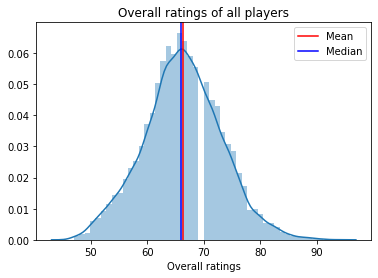

In [23]:
plt.savefig('overall ratings of players')
sns.distplot(fifa.Overall)
plt.axvline(fifa.Overall.mean(),label='Mean',color='red')
plt.axvline(fifa.Overall.median(),label='Median',color='blue')
plt.legend()
plt.xlabel('Overall ratings')
plt.title('Overall ratings of all players')
plt.savefig('overall ratings of players')
plt.show()

In [24]:
#observation
#From the plot we can come to a conclusion that:
#1)Average overall rating is 66
#2)Max ratings is 94 and min rating is 46
#3)Maximum players got a rating of 66.
#4)The plot is almost normal with a minimum skewness.So,we can say that the ratings are evenly distributed.


# 2.	Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


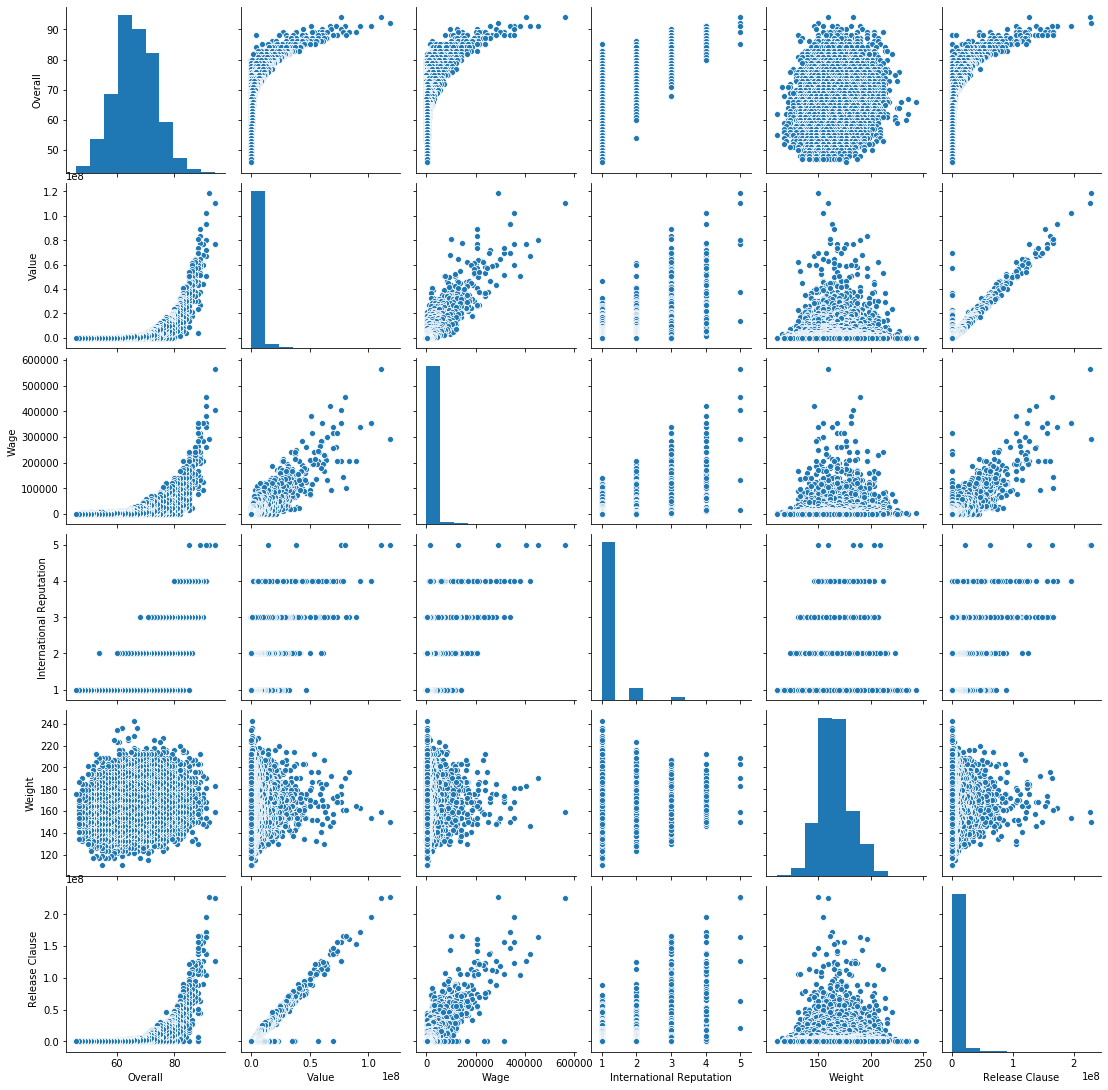

In [25]:
sns.pairplot(fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])
plt.savefig('pair plot')
plt.show()

In [26]:
#Observation
#1)Players with maximum ratings have maximum wages,current market value,internation reputation, 
#release clause amount.Hence, they show positive correlation.
#2)Players with good market value have higher release clause amount.Hence, they show positive correlation.

# 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020. 


In [27]:
#Feature engineering
#Adding a new feature 'contract valid until year' containing only the contract expiry year
fifa['Contract Valid Until Year']=fifa['Contract Valid Until'].map(lambda x: x.strftime('%Y'))

In [28]:
#Extracting data of players whose contract expires in 2020
players=fifa[fifa['Contract Valid Until Year']=='2020']
players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2020
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2020
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2020
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166,243621,N. Ayéva,16,Sweden,48,72,Örebro SK,70000.0,1000.0,Right,...,14.0,19.0,16.0,10.0,9.0,8.0,7.0,6.0,158000.0,2020
18179,246243,J. Williams,17,England,48,64,Northampton Town,50000.0,1000.0,Right,...,42.0,51.0,49.0,14.0,11.0,7.0,11.0,8.0,119000.0,2020
18187,240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,40000.0,1000.0,Right,...,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000.0,2020
18189,240160,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,60000.0,1000.0,Right,...,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,125000.0,2020


In [29]:
#top 20 players ranked by Overall score and whose contract expires in 2020
players=players.sort_values(by='Overall',ascending=False).head(20)
players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2020
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2020
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2020
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2020
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,2020
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,2020
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2020
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0,2020
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0,2020


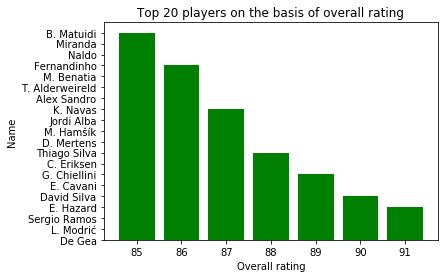

In [30]:
plt.bar(players.Overall,players.Name,color='g')
plt.title('Top 20 players on the basis of overall rating')
plt.xlabel('Overall rating')
plt.ylabel('Name')
plt.savefig('Top 20 players on the basis of overall rating')
plt.show()

In [31]:
#observation
#The above plot shows the top 20 players
#The highest rating is 91 which is shared among players E.Hazard,Sergio Ramos,L.Modric and De Gea.
#The lowest rating is 85, which is shared among players B.Matuidi, Miranda and Naldo. 
#Hence, these players need to either retain or improve their ratings in order to retain their rank.

# 3a)	What would the average wage for this set of players be?

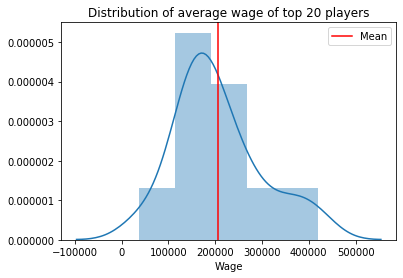

In [32]:
sns.distplot(players.Wage)
plt.axvline(players.Wage.mean(),label='Mean',color='red')
plt.legend()
plt.title('Distribution of average wage of top 20 players')
plt.show()

In [33]:
#From the plot we can say that:
#The average wage for top 20 players is:
players.Wage.mean()

205450.0

# b)	What is the average age?

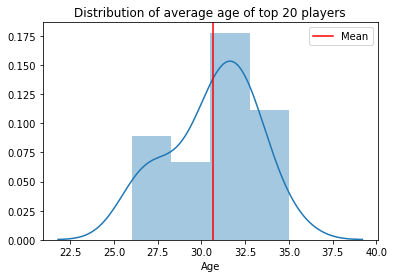

In [34]:
sns.distplot(players.Age)
plt.axvline(players.Age.mean(),label='Mean',color='red')
plt.legend()
plt.title('Distribution of average age of top 20 players')
plt.show()

In [35]:
#From the plot we can say that:
#The average age for top 20 players is:
players.Age.mean()

30.65

# c)	Is there a correlation between the Overall rating and Value for these players?

In [36]:
#Correlation between overall rating and market value of players
players[['Overall','Value']].corr() 

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


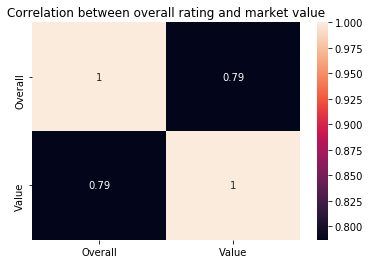

In [37]:
sns.heatmap(players[['Overall','Value']].corr(),annot=True)
plt.title('Correlation between overall rating and market value')
plt.savefig('correlation')
plt.show()

In [38]:
#observation
#There is almost highly positive correlation between Overall rating and market value.
#So, player’s with good overall ratings tend to have higher market value.

# 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [39]:
#Extracting top 5 players with higest overall rating per position
top_five=fifa.groupby(by='Position')[['Name','Position','Overall']].head()
top_five

,Name,Position,Overall
0,L. Messi,RF,94
1,Cristiano Ronaldo,ST,94
2,Neymar Jr,LW,92
3,De Gea,GK,91
4,K. De Bruyne,RCM,91
...,...,...,...
1774,C. Ciano,RF,75
2242,Jacson Zonta,RAM,74
2247,Leo Caldeirinha,LAM,74
2322,Sebas Couteira,RAM,74


In [55]:
#Top five players with higest overall rating per position is as follows(sorted):
top_five=top_five.sort_values(by=['Position','Overall'],ascending=[True,False])
top_five

,Name,Position,Overall
17,A. Griezmann,CAM,89
31,C. Eriksen,CAM,88
61,Roberto Firmino,CAM,86
66,T. Müller,CAM,86
74,M. Özil,CAM,86
...,...,...,...
1,Cristiano Ronaldo,ST,94
10,R. Lewandowski,ST,90
16,H. Kane,ST,89
23,S. Agüero,ST,89


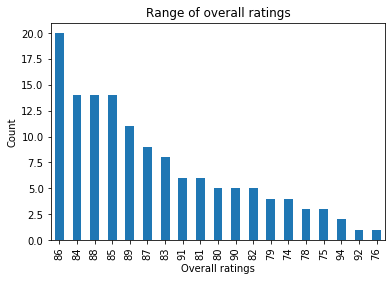

In [56]:
top_five.Overall.value_counts().plot(kind='bar')
plt.title('Range of overall ratings')
plt.xlabel('Overall ratings')
plt.ylabel('Count')
plt.savefig('Overall ratings')
plt.show()

In [42]:
#observation
#The range of overall ratings is between 74-94.
#Maximum number of players have secured the score of 86.
#Highest score of 94 is secured by 2 players.
#Lowest score of 74 is secured by 4 players.

# a)	Are there any players appearing in more than one Table. Please point out such players.

In [43]:
top_five.Name.value_counts()#value_counts gives the frequency of occurrence of each player. 
                            #Here the length is 135 which is same as that of top_five table's number of rows.
                            #Hence, with that we can say that all the players that are present are unique.
#Therefore, no player is appearing in more than one position.

Jordi Alba         1
Nicolás Formido    1
C. Ciano           1
A. Gómez           1
C. Eriksen         1
                  ..
L. Podolski        1
Sergio Busquets    1
Jorginho           1
J. Mojica          1
J. Oblak           1
Name: Name, Length: 135, dtype: int64

# b)	What is the average wage one can expect to pay for the top 5 in every position?

In [44]:
#Extracting the top 5 players with highest overall rating and their respective wages.
top_five_b=fifa.groupby(by='Position')[['Name','Position','Overall','Wage']].head()
top_five_b

,Name,Position,Overall,Wage
0,L. Messi,RF,94,565000.0
1,Cristiano Ronaldo,ST,94,405000.0
2,Neymar Jr,LW,92,290000.0
3,De Gea,GK,91,260000.0
4,K. De Bruyne,RCM,91,355000.0
...,...,...,...,...
1774,C. Ciano,RF,75,17000.0
2242,Jacson Zonta,RAM,74,13000.0
2247,Leo Caldeirinha,LAM,74,13000.0
2322,Sebas Couteira,RAM,74,14000.0


In [45]:
#Top 5 players with higest overall rating and their respective wages are as follows(sorted):
top_five_b=top_five_b.sort_values(by=['Position','Overall'],ascending=[True,False])
top_five_b

,Name,Position,Overall,Wage
17,A. Griezmann,CAM,89,145000.0
31,C. Eriksen,CAM,88,205000.0
61,Roberto Firmino,CAM,86,195000.0
66,T. Müller,CAM,86,135000.0
74,M. Özil,CAM,86,190000.0
...,...,...,...,...
1,Cristiano Ronaldo,ST,94,405000.0
10,R. Lewandowski,ST,90,205000.0
16,H. Kane,ST,89,205000.0
23,S. Agüero,ST,89,300000.0


In [46]:
#Average wage of top 5 players per position.
avg_wages=top_five_b.groupby(by='Position')[['Wage']].agg(np.mean)
avg_wages.sort_values(by='Wage',ascending=False)

,Wage
Position,
ST,294000.0
LW,261000.0
RCM,240800.0
RCB,231000.0
CDM,217000.0
RW,202000.0
GK,192800.0
LCM,184400.0
LB,177200.0


In [47]:
#Observation:
#ST pays highest wages to it's top 5 players with an average sum of 294000.0 euros.
#LWB plays the lowest wages to it's top 5 players with an average sum of 34200.0 euros.

In [63]:
#Final conclusion
#List of potential players for ‘Brussels United FC’
final=fifa.groupby(by='Position')[['ID','Name','Nationality','Position','Overall','Wage']].head()
final=final.sort_values(by=['Overall','Wage'],ascending=[False,True])[['ID','Name','Nationality','Overall','Wage']].head(20)
final=final.reset_index(drop=True)
final

,ID,Name,Nationality,Overall,Wage
0,20801,Cristiano Ronaldo,Portugal,94,405000.0
1,158023,L. Messi,Argentina,94,565000.0
2,190871,Neymar Jr,Brazil,92,290000.0
3,193080,De Gea,Spain,91,260000.0
4,183277,E. Hazard,Belgium,91,340000.0
5,192985,K. De Bruyne,Belgium,91,355000.0
6,155862,Sergio Ramos,Spain,91,380000.0
7,177003,L. Modrić,Croatia,91,420000.0
8,176580,L. Suárez,Uruguay,91,455000.0
9,200389,J. Oblak,Slovenia,90,94000.0


In [ ]:
#observation
#Here is the tabulation of details of possible players who can be hired for excellent debutant team performance.
#The list contains the basic details of the players along with their overall ratings and wages.